## Final Project Submission

Please fill out:
* Student name: Tim Fuger
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: TBD


## Project Goal

An appraisal company has approached us in search of a more automated and more accurate way to determine home prices. The company so happend to be located in kings county, and the company has data from the assessor's website that they would like to use in this effort. They would like the model solution to fulfill the following:

- Use the model as a way to train new employees on determining home prices from different features of the home
- Give the model to current employees in order to give them insight into appraising houses in areas they do not typically work in.


## Data Source and Data Exploration

We will start by importing the packages required and transfer the datya to a pandas dataframe:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

df = pd.read_csv("data\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The data contains a number of categories with which to work with. To get the best working model (as in a model that is the most reliable and accounts for a majority of variance within the data) we will want to keep all of the current columns in the data. 

The first thing we will want to do is see what is contained in the data already. Then work on cleaning the data.

In [2]:
df1 = df.copy()

In [3]:
# What types of data are we working with?
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# Do the counts of data all match? What are the min and max values?
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


First we want to check for any Nan or zero values in the dataframe and remove those rows.

In [5]:
df1.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Lets drop the null values

In [6]:
df1 = df1.dropna()

In [7]:
# double check to confirm nulls have been dropped
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Looks like we should be good to go with our current information. 

Lets convert the categorical columns into numeric columns to be read by the model. Looks like we will need to convert waterfront, view, condition, grade, date, and zipcode to information that can be read by our model.

In [8]:
# Read unique values for waterfront
df1['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [9]:
# Read unique values for view
df1['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [10]:
# Read unique values for condition
df1['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [11]:
# Read unique values for grade
df1['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [12]:
# Read unique values for zipcode
df1['zipcode'].unique()

array([98125, 98136, 98074, 98053, 98003, 98146, 98038, 98115, 98107,
       98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98112,
       98052, 98027, 98117, 98058, 98001, 98056, 98166, 98119, 98023,
       98007, 98070, 98148, 98105, 98042, 98059, 98122, 98144, 98004,
       98005, 98034, 98075, 98010, 98118, 98199, 98032, 98045, 98102,
       98077, 98198, 98108, 98178, 98177, 98029, 98006, 98109, 98022,
       98033, 98155, 98024, 98168, 98011, 98031, 98106, 98028, 98072,
       98188, 98065, 98008, 98055, 98116, 98014, 98039], dtype=int64)

In [13]:
# convert waterfront to 0 or 1
df1.loc[df1['waterfront'] == 'NO', 'waterfront_num'] = 0
df1.loc[df1['waterfront'] == 'YES', 'waterfront_num'] = 1

In [14]:
# convert view to number based on rating
df1.loc[df1['view'] == 'NONE', 'view_num'] = 0
df1.loc[df1['view'] == 'FAIR', 'view_num'] = 1
df1.loc[df1['view'] == 'AVERAGE', 'view_num'] = 2
df1.loc[df1['view'] == 'GOOD', 'view_num'] = 3
df1.loc[df1['view'] == 'EXCELLENT', 'view_num'] = 4

In [15]:
# convert condition to number based on rating
df1.loc[df['condition'] == "Poor", 'condition_num'] = 1 
df1.loc[df['condition'] == "Fair", 'condition_num'] = 2
df1.loc[df['condition'] == "Average", 'condition_num'] = 3 
df1.loc[df['condition'] == "Good", 'condition_num'] = 4
df1.loc[df['condition'] == "Very Good", 'condition_num'] = 5

In [16]:
# convert the grade from a string to a float
df1['grade_num'] = df1['grade'].astype(str).str[0]
df1['grade_num'] = df1['grade_num'].astype(float)

In [17]:
# convert date to a number based on season
# with winter being 1, spring being 2, summer being 3, and fall being 4
df1['date'] = pd.to_datetime(df1['date'])  
df1['date'] = df1['date'].dt.month%12 // 3 + 1

For the zipcode we will need to break it up into categories for each zipcode.

In [18]:
# label encode zipcode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['zipcode'].drop_duplicates()) 
df1['zipcode'] = le.transform(df1['zipcode'])

In [19]:
# confirm that new categories reflect the data we wanted to convert
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_num,view_num,condition_num,grade_num
1,6414100192,1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,55,47.7210,-122.319,1690,7639,0.0,0.0,3.0,7.0
3,2487200875,1,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,58,47.5208,-122.393,1360,5000,0.0,0.0,5.0,7.0
4,1954400510,1,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,37,47.6168,-122.045,1800,7503,0.0,0.0,3.0,8.0
5,7237550310,2,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,0.0,29,47.6561,-122.005,4760,101930,0.0,0.0,3.0,1.0
6,1321400060,3,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,0.0,2,47.3097,-122.327,2238,6819,0.0,0.0,3.0,7.0


Lets divide the price by 1,000,000 to have a better range of numbers to work with

In [20]:
df1['price'] = df1['price']/1000000

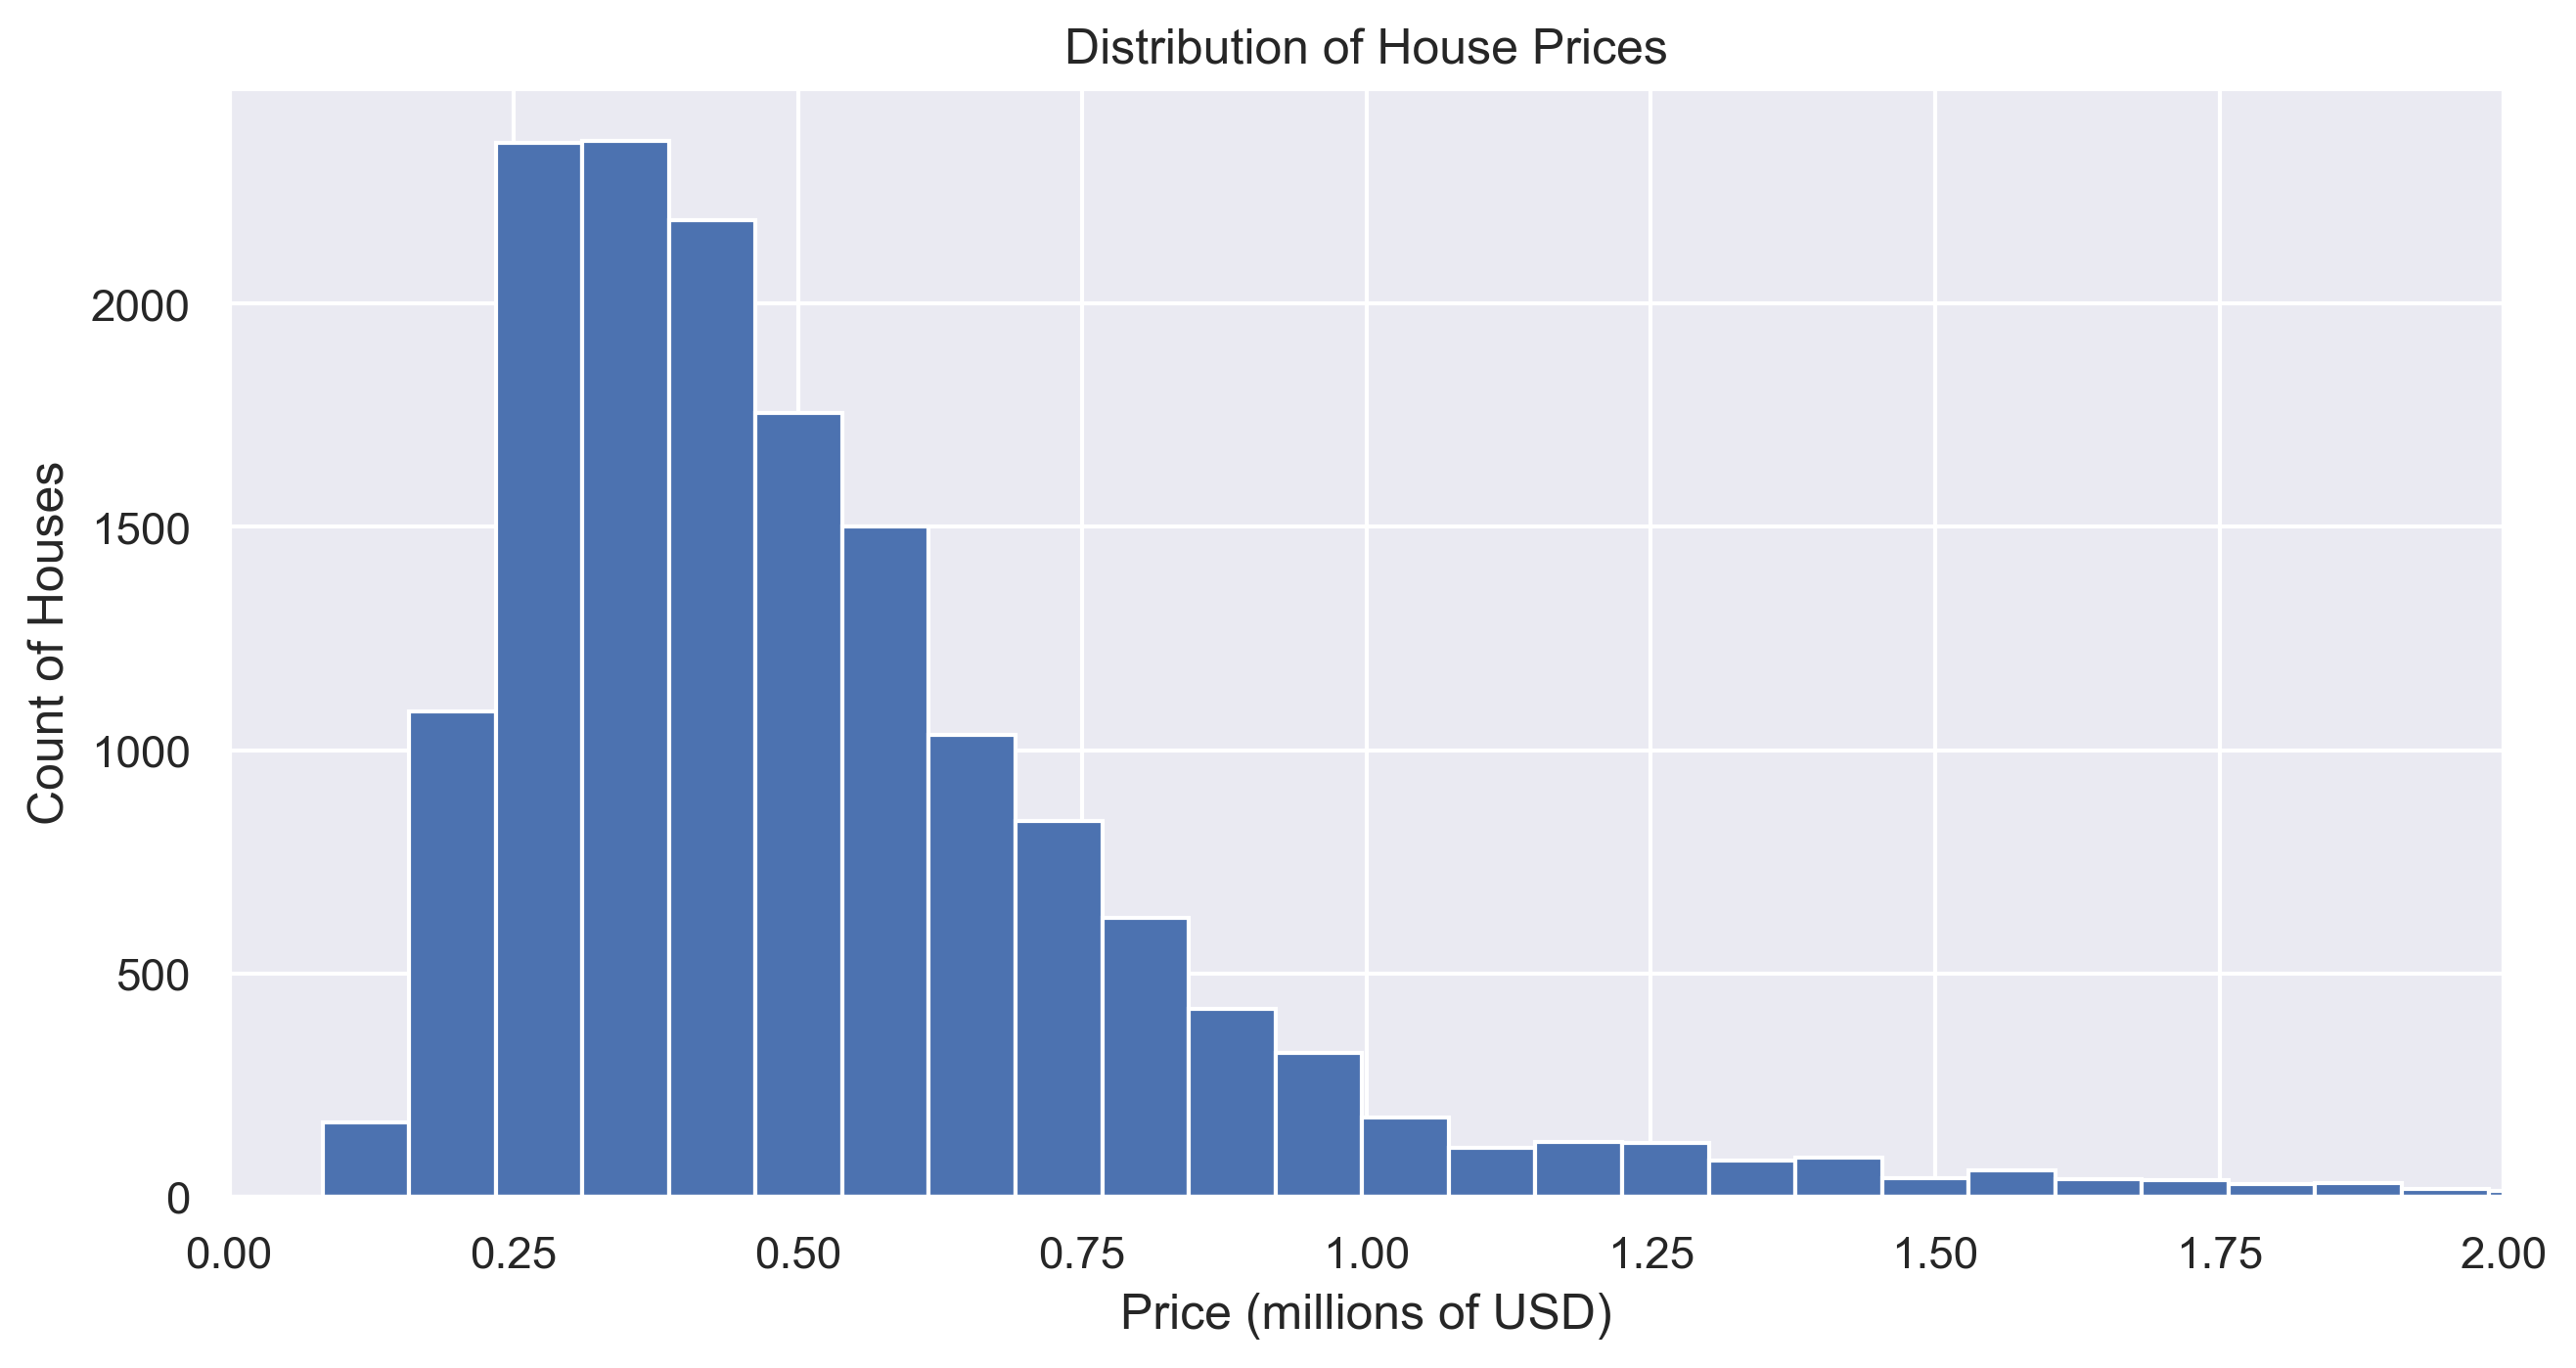

In [21]:
# plot the distribution of house prices
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df1['price'], bins=100)

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Price (millions of USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices")

fig.set_dpi(300.0)

plt.xlim([0, 2])

plt.savefig('images/House-Price-Distribution.png');

It looks like sqft_basement has a question mark in it. Lets drop the rows that have that.

In [22]:
df1 = df1[df1['sqft_basement'] != '?']
df1['sqft_basement'] = df1['sqft_basement'].astype(float)

Lets plot all of the data to see how it looks

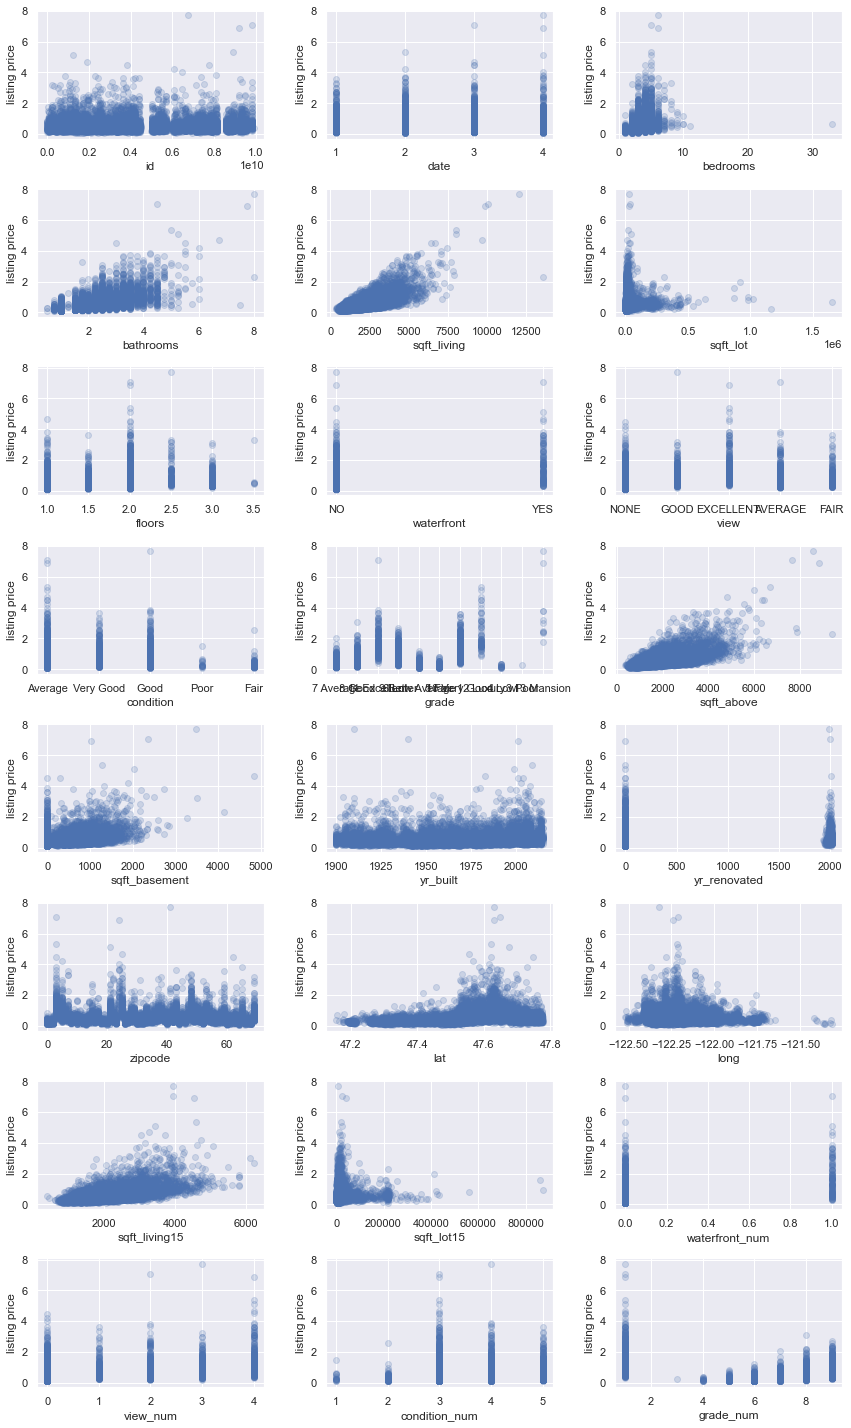

In [23]:
df1plot = df1
df1plot = df1plot.drop(labels=['price'], axis=1)

fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(df1plot.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df1plot[col], df1['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

A majority of the categories look like they have good correlation to the listing price with the exception of the grade_num. It looks like there are quite a few data points with grade number of 0. Lets take a closer look at that

In [24]:
df1['grade_num'].value_counts()

7.0    6405
8.0    4338
9.0    1875
6.0    1454
1.0    1179
5.0     161
4.0      16
3.0       1
Name: grade_num, dtype: int64

Looks like we have quite a number of 1 grades. I cant imagine that there were this many foreclosures or terribly managed properties. Most likely these probably were the default entry for any houses that were not graded. Most likely this would skew our data, so we will remove the column and then go on to create a linear regession model from statsmodel to see how our data will perform.

In [25]:
# Create another dataframe to operate on
df2 = df1.copy()

In [26]:
# drop columns that are not needed or that we created rating columns for
df2 = df2.drop(labels=['id', 'waterfront', 'view', 'condition', 'grade', 'grade_num'], axis=1)

In [27]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = df2.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df2['price'],predictors_int).fit()

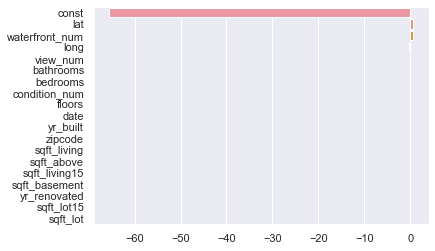

In [28]:
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

Lets drop the constant and see how each feature is affected by price, by every one unit change in the feature.

In [29]:
# drop constant
coeff.drop(labels='const', axis=0, inplace=True)

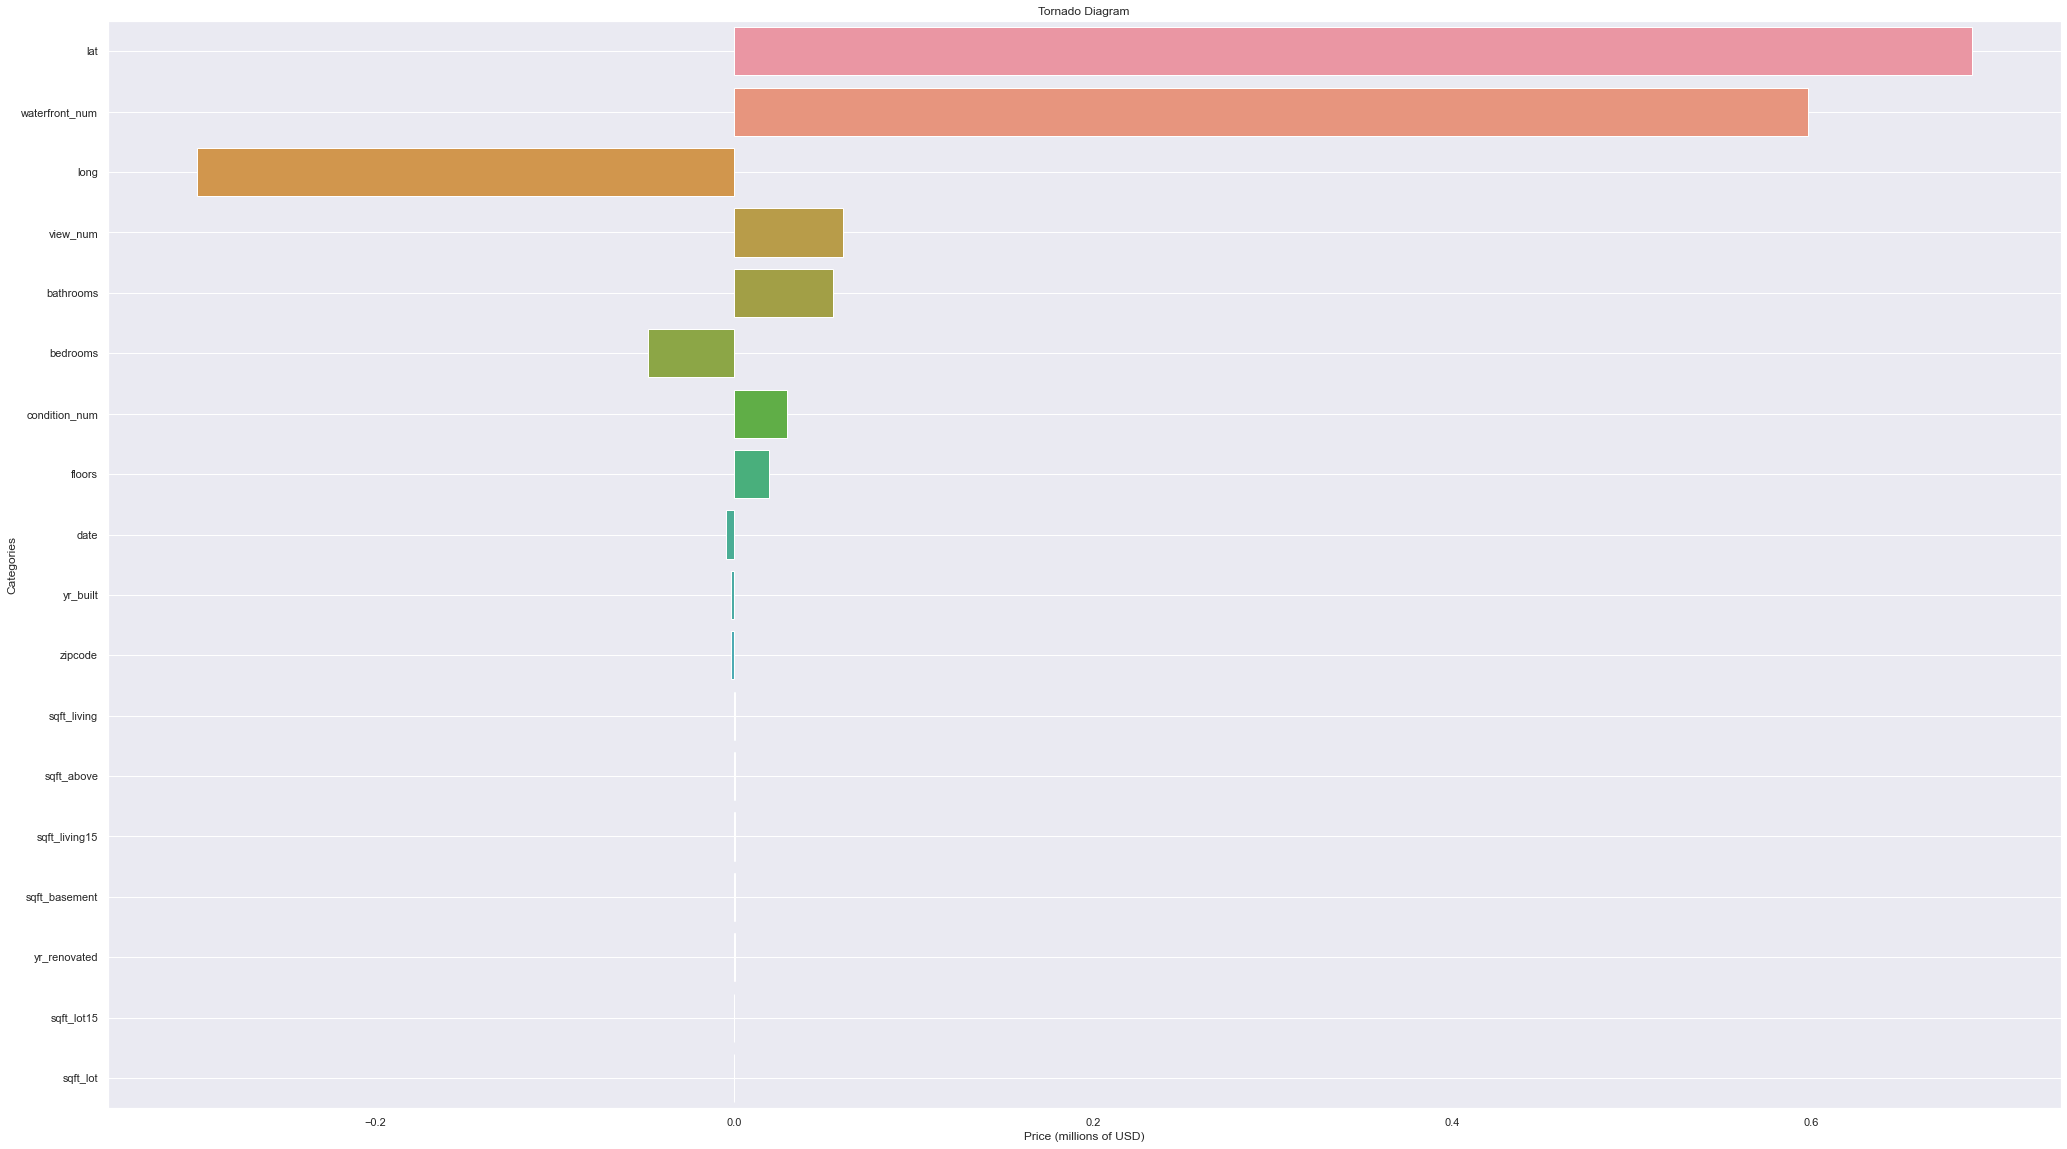

In [30]:
# plot features in tornado diagram

plt.figure(figsize=(35,20))
sns.barplot(x=coeff.values, y=coeff.index, orient='h')
plt.xlabel('Price (millions of USD)')
plt.ylabel('Categories')
plt.title('Tornado Diagram')
plt.grid()

plt.savefig('images/Tornado-Diagram.png');

It looks like waterfront and lat really have a great effect on price for every unit change. Lets make a statsmodel regression model and see hwo that comes out.

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1900.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:29:34   Log-Likelihood:                 2041.1
No. Observations:               15429   AIC:                            -4046.
Df Residuals:                   15411   BIC:                            -3909.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -65.6125      2.110    -31.100      0.000     -69.748     -61.477
date              -0.0050      0.002     -2.987      0.003      -0.008      -0.002
bedrooms          -0.0482      0.002    -20.805      0.000      -0.053      -0.044
bathrooms          0.0550      0.004     13.569      0.000       0.047       0.063
sqft_living        0.0001   2.66e-06     55.615      0.000       0.000       0.000
sqft_lot        1.298e-07   5.88e-08      2.209      0.027    1.46e-08    2.45e-07
floors             0.0194      0.004      4.325      0.000       0.011       0.028
sqft_above         0.0001   2.66e-06     40.000      0.000       0.000       0.000
sqft_basement   4.124e-05   3.28e-06     12.586      0.000    3.48e-05    4.77e-05
yr_built          -0.0020   8.83e-05    -22.641      0.000      -0.002      -0.002
yr_renovated     2.65e-05   4.61e-06      5.753      0.000    1.75e-05    3.55e-05
zipcode           -0.0018      0.000    -16.299      0.000      -0.002      -0.002
lat                0.6897      0.013     51.791      0.000       0.664       0.716
long              -0.2998      0.016    -18.966      0.000      -0.331      -0.269
sqft_living15   6.066e-05   4.13e-06     14.706      0.000    5.26e-05    6.87e-05
sqft_lot15     -4.159e-07   8.95e-08     -4.649      0.000   -5.91e-07   -2.41e-07
waterfront_num     0.5982      0.022     27.533      0.000       0.556       0.641
view_num           0.0607      0.003     22.665      0.000       0.055       0.066
condition_num      0.0290      0.003      9.899      0.000       0.023       0.035
==============================================================================
Omnibus:                    11994.649   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           898168.239
Skew:                           3.162   Prob(JB):                         0.00
Kurtosis:                      39.839   Cond. No.                     1.48e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Very nice! The R squared value accounts for a good amount of variance at 0.677 and all of the p values show that we fall below an alpha threshold of 0.05. Lets see if we cant tweak the model to get it to run better by looking at our residuals

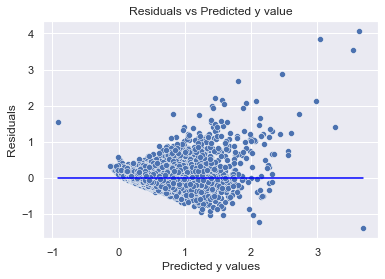

In [32]:
# return residuals from model
residuals = model.resid

# return predicted values from model
y_pred = model.fittedvalues

# create a scatterplot with a baseline shown
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[y_pred.min(),y_pred.max()],y=[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

We will probably have to remove some of the data points that are outliers, but other than that it looks like homoscedasticity is held. Are the residuals normal?

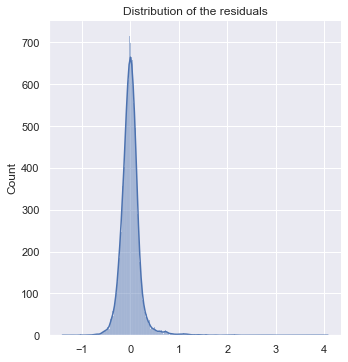

In [33]:
# check for normality among the residuals
p = sns.displot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

Residuals are indeed normal but we have a long tail on the upper x bounds. Lets take a look at a qqplot

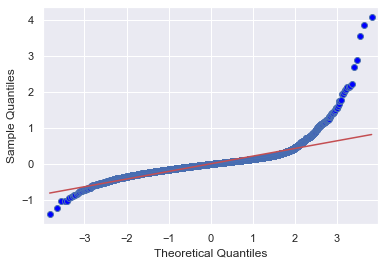

In [34]:
fig = sm.qqplot(data=residuals, line ='s')
plt.show()

From just looking at the residuals plot, we definitely need to take out some of the higher residuals as they are throwing the data out of whack. We will make another copy of the dataframe again so we are not changing the current one.

In [35]:
df3 = df2.copy()
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_num,view_num,condition_num
1,1,0.5380,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,55,47.7210,-122.319,1690,7639,0.0,0.0,3.0
3,1,0.6040,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,58,47.5208,-122.393,1360,5000,0.0,0.0,5.0
4,1,0.5100,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,37,47.6168,-122.045,1800,7503,0.0,0.0,3.0
5,2,1.2300,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,29,47.6561,-122.005,4760,101930,0.0,0.0,3.0
8,2,0.2295,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,60,47.5123,-122.337,1780,8113,0.0,0.0,3.0


From dropping all of the rows our index is off (you can see in the frame above), so we reset it below. And then we will take out the data points that are at the upper and lower bounds of the plot

In [36]:
# reset index due to missing index values that you can see from the index in the head of the dataframe above
df3.reset_index(inplace=True)

In [37]:
# IQR
Q1 = np.percentile(df3['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df3.shape)
 
# Upper bound
upper = np.where(df3['price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df3['price'] <= (Q1-1.5*IQR))  

''' Removing the Outliers '''
df3.drop(labels=upper[0], inplace = True)
df3.drop(lower[0], inplace = True)
 
print("New Shape: ", df3.shape)

Old Shape:  (15429, 20)
New Shape:  (14598, 20)


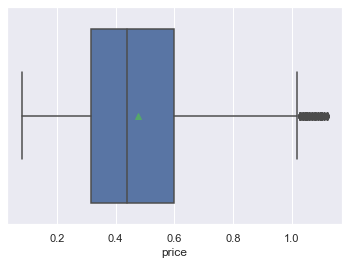

In [38]:
# check charges variable for outliers
sns.boxplot(x=df3["price"], showmeans=True);

Looks like we got all of the outliers out of the data without losing too much data. Lets test the data again

In [39]:
# create predictors
predictors2 = df3.drop(['price'], axis=1)

# create model intercept
predictors_int2 = sm.add_constant(predictors2)

# fit model to data
model2 = sm.OLS(df3['price'],predictors_int2).fit()

In [40]:
# return residuals from model
residuals2 = model2.resid

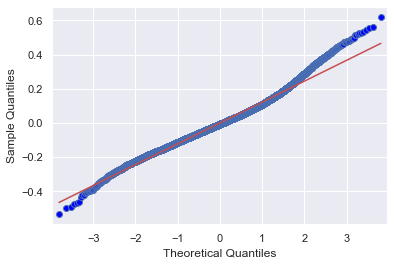

In [41]:
# plot residuals
fig = sm.qqplot(residuals2, line ='s')
plt.show()

In [42]:
df3.head()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_num,view_num,condition_num
0,1,1,0.5380,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,55,47.7210,-122.319,1690,7639,0.0,0.0,3.0
1,3,1,0.6040,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,58,47.5208,-122.393,1360,5000,0.0,0.0,5.0
2,4,1,0.5100,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,37,47.6168,-122.045,1800,7503,0.0,0.0,3.0
4,8,2,0.2295,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,60,47.5123,-122.337,1780,8113,0.0,0.0,3.0
5,9,2,0.3230,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,23,47.3684,-122.031,2390,7570,0.0,0.0,3.0


We dont need the index column so we will drop that.

In [43]:
# drop index column
df3.drop(labels=['index'], axis=1, inplace=True)

In [44]:
# create predictors
predictors3 = df3.drop(['price'], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(df3['price'],predictors_int3).fit()

We will plot all of the features in relation to price to see what the data looks like

In [45]:
# Create separate plot dataframe to drop price
df3plot = df3
df3plot = df3plot.drop(labels=['price'], axis=1)

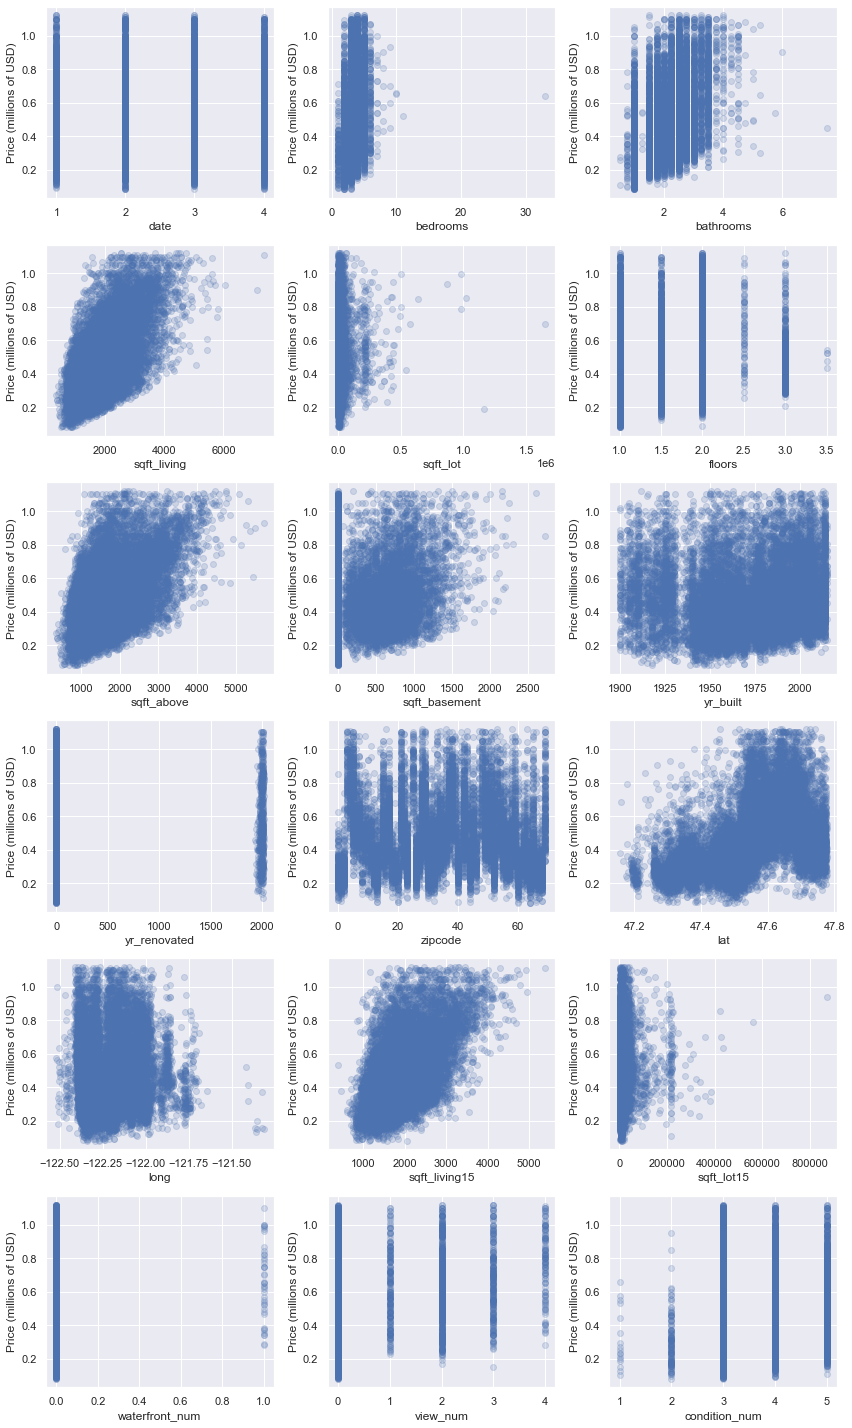

In [46]:
# plot all features in scatter plots
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(df3plot.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df3plot[col], df3['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Price (millions of USD)")

Ok defintely cleaned out some data. Lets run it through statsmodel again and see what we get

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:29:42   Log-Likelihood:                 9984.4
No. Observations:               14598   AIC:                        -1.993e+04
Df Residuals:                   14580   BIC:                        -1.980e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -39.3819      1.248    -31.556      0.000     -41.828     -36.936
date              -0.0037      0.001     -3.760      0.000      -0.006      -0.002
bedrooms          -0.0165      0.001    -11.719      0.000      -0.019      -0.014
bathrooms          0.0298      0.002     12.023      0.000       0.025       0.035
sqft_living     7.161e-05   1.76e-06     40.722      0.000    6.82e-05    7.51e-05
sqft_lot        2.493e-07   3.49e-08      7.141      0.000    1.81e-07    3.18e-07
floors             0.0426      0.003     15.720      0.000       0.037       0.048
sqft_above      4.689e-05   1.73e-06     27.055      0.000    4.35e-05    5.03e-05
sqft_basement   2.473e-05   2.07e-06     11.916      0.000    2.07e-05    2.88e-05
yr_built          -0.0012   5.35e-05    -22.467      0.000      -0.001      -0.001
yr_renovated    2.305e-05   2.86e-06      8.073      0.000    1.75e-05    2.87e-05
zipcode           -0.0007   6.63e-05    -11.034      0.000      -0.001      -0.001
lat                0.6100      0.008     78.444      0.000       0.595       0.625
long              -0.1039      0.009    -11.135      0.000      -0.122      -0.086
sqft_living15   8.029e-05   2.67e-06     30.039      0.000    7.51e-05    8.55e-05
sqft_lot15     -1.929e-07   5.38e-08     -3.588      0.000   -2.98e-07   -8.75e-08
waterfront_num     0.0809      0.020      4.075      0.000       0.042       0.120
view_num           0.0365      0.002     20.686      0.000       0.033       0.040
condition_num      0.0289      0.002     16.574      0.000       0.025       0.032
==============================================================================
Omnibus:                      875.584   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1415.429
Skew:                           0.489   Prob(JB):                    4.40e-308
Kurtosis:                       4.170   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R squared value dropped a little bit but our Omnibus and Jarque Bera scores significantly improved. So even though we are accounting for less variance, we know that our model is closer to normality. We will perform a log transform and see if we cant get a better R squared value

In [48]:
# copr dataframe again
df4 = df3.copy()

In [49]:
# create non normal variables list
non_normal = ['price']

# use for loop to apply log transform on variable
for feat in non_normal:
    df4[feat] = df4[feat].map(lambda x: np.log(x))

In [50]:
# create predictors
predictors3 = df4.drop(['price'], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(df4['price'],predictors_int3).fit()

In [51]:
df4.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_num,view_num,condition_num
0,1,-0.619897,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,55,47.7210,-122.319,1690,7639,0.0,0.0,3.0
1,1,-0.504181,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,58,47.5208,-122.393,1360,5000,0.0,0.0,5.0
2,1,-0.673345,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,37,47.6168,-122.045,1800,7503,0.0,0.0,3.0
4,2,-1.471852,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,60,47.5123,-122.337,1780,8113,0.0,0.0,3.0
5,2,-1.130103,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,23,47.3684,-122.031,2390,7570,0.0,0.0,3.0


In [52]:
# view model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1730.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:29:44   Log-Likelihood:                -798.59
No. Observations:               14598   AIC:                             1633.
Df Residuals:                   14580   BIC:                             1770.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -88.1409      2.612    -33.742      0.000     -93.261     -83.021
date              -0.0083      0.002     -4.031      0.000      -0.012      -0.004
bedrooms          -0.0251      0.003     -8.546      0.000      -0.031      -0.019
bathrooms          0.0772      0.005     14.896      0.000       0.067       0.087
sqft_living        0.0001   3.68e-06     37.064      0.000       0.000       0.000
sqft_lot        5.358e-07   7.31e-08      7.334      0.000    3.93e-07    6.79e-07
floors             0.1039      0.006     18.306      0.000       0.093       0.115
sqft_above      7.617e-05   3.63e-06     20.998      0.000    6.91e-05    8.33e-05
sqft_basement   6.026e-05   4.34e-06     13.875      0.000    5.17e-05    6.88e-05
yr_built          -0.0021      0.000    -18.426      0.000      -0.002      -0.002
yr_renovated    4.377e-05   5.98e-06      7.323      0.000    3.21e-05    5.55e-05
zipcode           -0.0012      0.000     -8.912      0.000      -0.002      -0.001
lat                1.4845      0.016     91.200      0.000       1.453       1.516
long              -0.1607      0.020     -8.228      0.000      -0.199      -0.122
sqft_living15      0.0002   5.59e-06     29.679      0.000       0.000       0.000
sqft_lot15      -2.06e-07   1.13e-07     -1.830      0.067   -4.27e-07    1.46e-08
waterfront_num     0.2190      0.042      5.270      0.000       0.138       0.300
view_num           0.0664      0.004     17.964      0.000       0.059       0.074
condition_num      0.0661      0.004     18.140      0.000       0.059       0.073
==============================================================================
Omnibus:                      260.833   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.217
Skew:                          -0.217   Prob(JB):                     1.82e-80
Kurtosis:                       3.644   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Got even better normal values and a better R squared. Maybe we will try to apply min max scaling to the larger values.

In [53]:
df4.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_num', 'view_num', 'condition_num'],
      dtype='object')

In [54]:
# import preprocessing module from sklearn
from sklearn import preprocessing

# Use min max scaling on dataset
minmax_scale = preprocessing.MinMaxScaler().fit(df4[
    ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_renovated', 'lat', 'long', 
     'sqft_living15', 'sqft_lot15', 'yr_built', 'zipcode', 'sqft_basement']])
#df_minmax = pd.DataFrame(minmax_scale.transform(insurance_df[['age', 'bmi', 'children']]))
df_minmax = minmax_scale.transform(df4[
    ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_renovated', 'lat', 'long', 
     'sqft_living15', 'sqft_lot15', 'yr_built', 'zipcode', 'sqft_basement']])

In [55]:
# create a copy of dataframe
df5 = df4.copy()

# drop old columns
df5 = df5.drop(['sqft_living', 'sqft_lot', 'sqft_above', 'yr_renovated', 'lat', 'long', 
     'sqft_living15', 'sqft_lot15', 'yr_built', 'zipcode', 'sqft_basement'], axis= 1)

In [56]:
# create new DataFrame with minmax variables
# add NumPy matrix as new columns in DataFrame
df5 = pd.concat([df5, pd.DataFrame(df_minmax)], axis=1)

In [57]:
df5.head()

,date,price,bedrooms,bathrooms,floors,waterfront_num,view_num,condition_num,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.619897,3.0,2.25,2.0,0.0,0.0,3.0,0.315186,0.004072,0.337079,0.988089,0.908959,0.166113,0.259185,0.008018,0.443478,0.797101,0.147059
1,1.0,-0.504181,4.0,3.00,1.0,0.0,0.0,5.0,0.227794,0.002714,0.127341,0.000000,0.586939,0.104651,0.192933,0.004987,0.565217,0.840580,0.334559
2,1.0,-0.673345,3.0,2.00,1.0,0.0,0.0,3.0,0.187679,0.004579,0.245318,0.000000,0.741354,0.393688,0.281269,0.007862,0.756522,0.536232,0.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202006,0.004210,0.127341,0.000000,0.573267,0.151163,0.277254,0.008562,0.521739,0.869565,0.268382
4,2.0,-1.471852,3.0,1.00,1.0,0.0,0.0,3.0,0.217765,0.003659,0.284644,0.000000,0.341805,0.405316,0.399719,0.007939,0.895652,0.333333,0.000000


Just from looking at the head it looks like we have some NaN values that got in there. We will drop those and then make another statsmodel model

In [58]:
# drop Nan values in dataframe
df5 = df5.dropna()

In [59]:
# create predictors
predictors4 = df5.drop(['price'], axis=1)

# create model intercept
predictors_int4 = sm.add_constant(predictors4)

# fit model to data
model4 = sm.OLS(df5['price'], predictors_int4).fit()

In [60]:
# run model summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     300.1
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:29:46   Log-Likelihood:                -6300.1
No. Observations:               13827   AIC:                         1.264e+04
Df Residuals:                   13809   BIC:                         1.277e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8722      0.031    -60.841      0.000      -1.933      -1.812
date              -0.0030      0.003     -0.948      0.343      -0.009       0.003
bedrooms           0.0443      0.004     10.836      0.000       0.036       0.052
bathrooms          0.2189      0.006     35.839      0.000       0.207       0.231
floors             0.1168      0.007     15.576      0.000       0.102       0.131
waterfront_num    -0.0329      0.062     -0.532      0.595      -0.154       0.088
view_num           0.1273      0.005     23.952      0.000       0.117       0.138
condition_num      0.0704      0.005     13.754      0.000       0.060       0.080
0                  0.0399      0.019      2.065      0.039       0.002       0.078
1                 -0.1582      0.182     -0.868      0.385      -0.516       0.199
2                  0.0551      0.025      2.246      0.025       0.007       0.103
3                  0.0194      0.018      1.082      0.279      -0.016       0.055
4                  0.0250      0.015      1.636      0.102      -0.005       0.055
5                  0.0244      0.036      0.684      0.494      -0.045       0.094
6                 -0.0754      0.042     -1.814      0.070      -0.157       0.006
7                  0.1946      0.149      1.302      0.193      -0.098       0.488
8                 -0.0101      0.016     -0.642      0.521      -0.041       0.021
9                 -0.0029      0.014     -0.201      0.841      -0.031       0.025
10                -0.0059      0.021     -0.286      0.775      -0.046       0.035
==============================================================================
Omnibus:                      300.850   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.376
Skew:                          -0.110   Prob(JB):                     8.27e-39
Kurtosis:                       2.494   Cond. No.                     2.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Nope, that totally obliterated our model.

Out of all the 4 models we produced, it looks like the third model provided the a good R squared value and is the most normal which would give us more accuracy in the model. We will use this model going forward with our test and train data.

In [61]:
df10 = df4.copy()
df10.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_num,view_num,condition_num
0,1,-0.619897,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,55,47.7210,-122.319,1690,7639,0.0,0.0,3.0
1,1,-0.504181,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,58,47.5208,-122.393,1360,5000,0.0,0.0,5.0
2,1,-0.673345,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,37,47.6168,-122.045,1800,7503,0.0,0.0,3.0
4,2,-1.471852,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,60,47.5123,-122.337,1780,8113,0.0,0.0,3.0
5,2,-1.130103,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,23,47.3684,-122.031,2390,7570,0.0,0.0,3.0


Lets break up the data into the test and train datasets.

Then we can take a look at the y values and then how the x values compare with the y values

In [62]:
# separate dataframe into test and train datasets
train = df10
test = df10

X_train = train.drop("price", axis=1)
y_train = train["price"]

X_test = test.drop("price", axis=1)
y_test = test["price"]

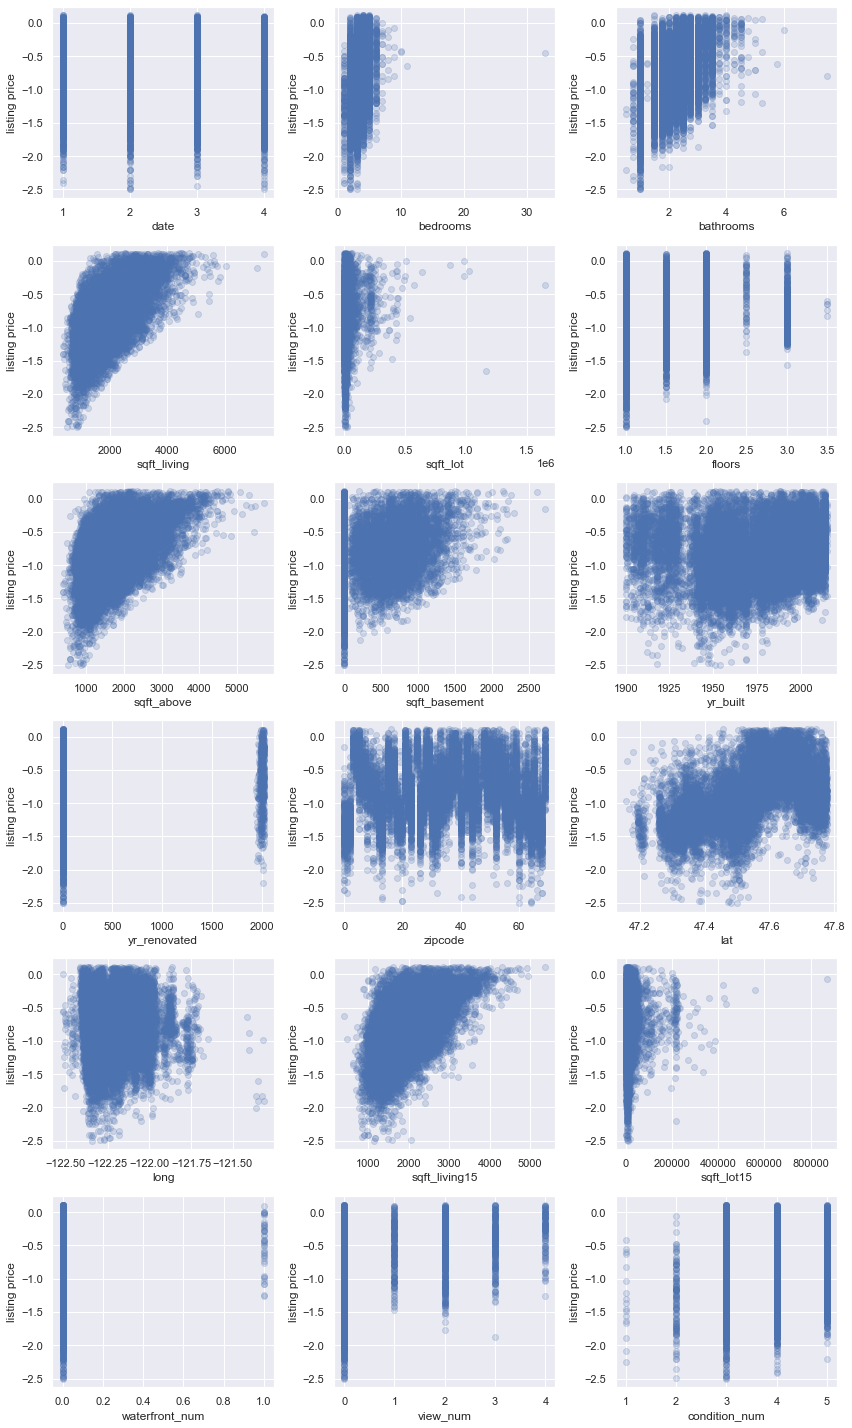

In [63]:
# plot all x values compared to y values
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 20))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

Now that our data looks good, and nothing looks off in the scatter plots, we will create a corelation plot to see how all of the features correlate to price

In [64]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr().loc[['price'], :]
corr = corr.transpose()
corr = corr.sort_values(by=['price'], ascending=False)
corr.reset_index(inplace=True)
corr.drop(corr[corr['index'] == 'price'].index, inplace=True)
corr

,index,price
1,sqft_living,0.604157
2,sqft_living15,0.543673
3,sqft_above,0.512190
4,lat,0.491130
5,bathrooms,0.460978
6,bedrooms,0.295238
7,floors,0.290069
8,sqft_basement,0.230765
9,view_num,0.214685
10,sqft_lot,0.087826


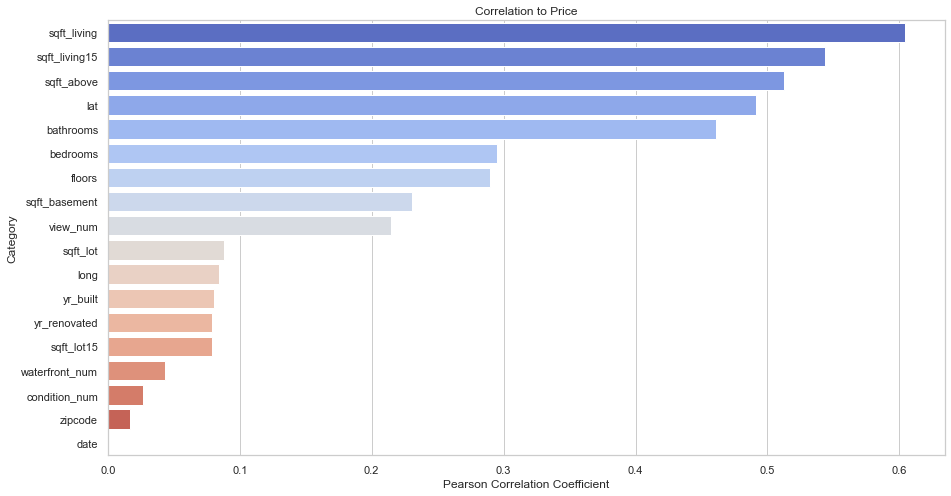

In [65]:
# corr.drop(labels='price', axis=0)
plt.figure(figsize=(15,8))

sns.set_theme(style='whitegrid')
s = sns.barplot(x='price', y='index', data=corr, palette='coolwarm')

# sns.set(rc={"figure.figsize":(80, 40)})
# s.set_xticklabels(labels=corr['index'],rotation=90)
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Category')
plt.title('Correlation to Price')
sns.set(font_scale=3)

plt.savefig('images/Price-Correlation.png');

And how does the correlated features look like in a heat map

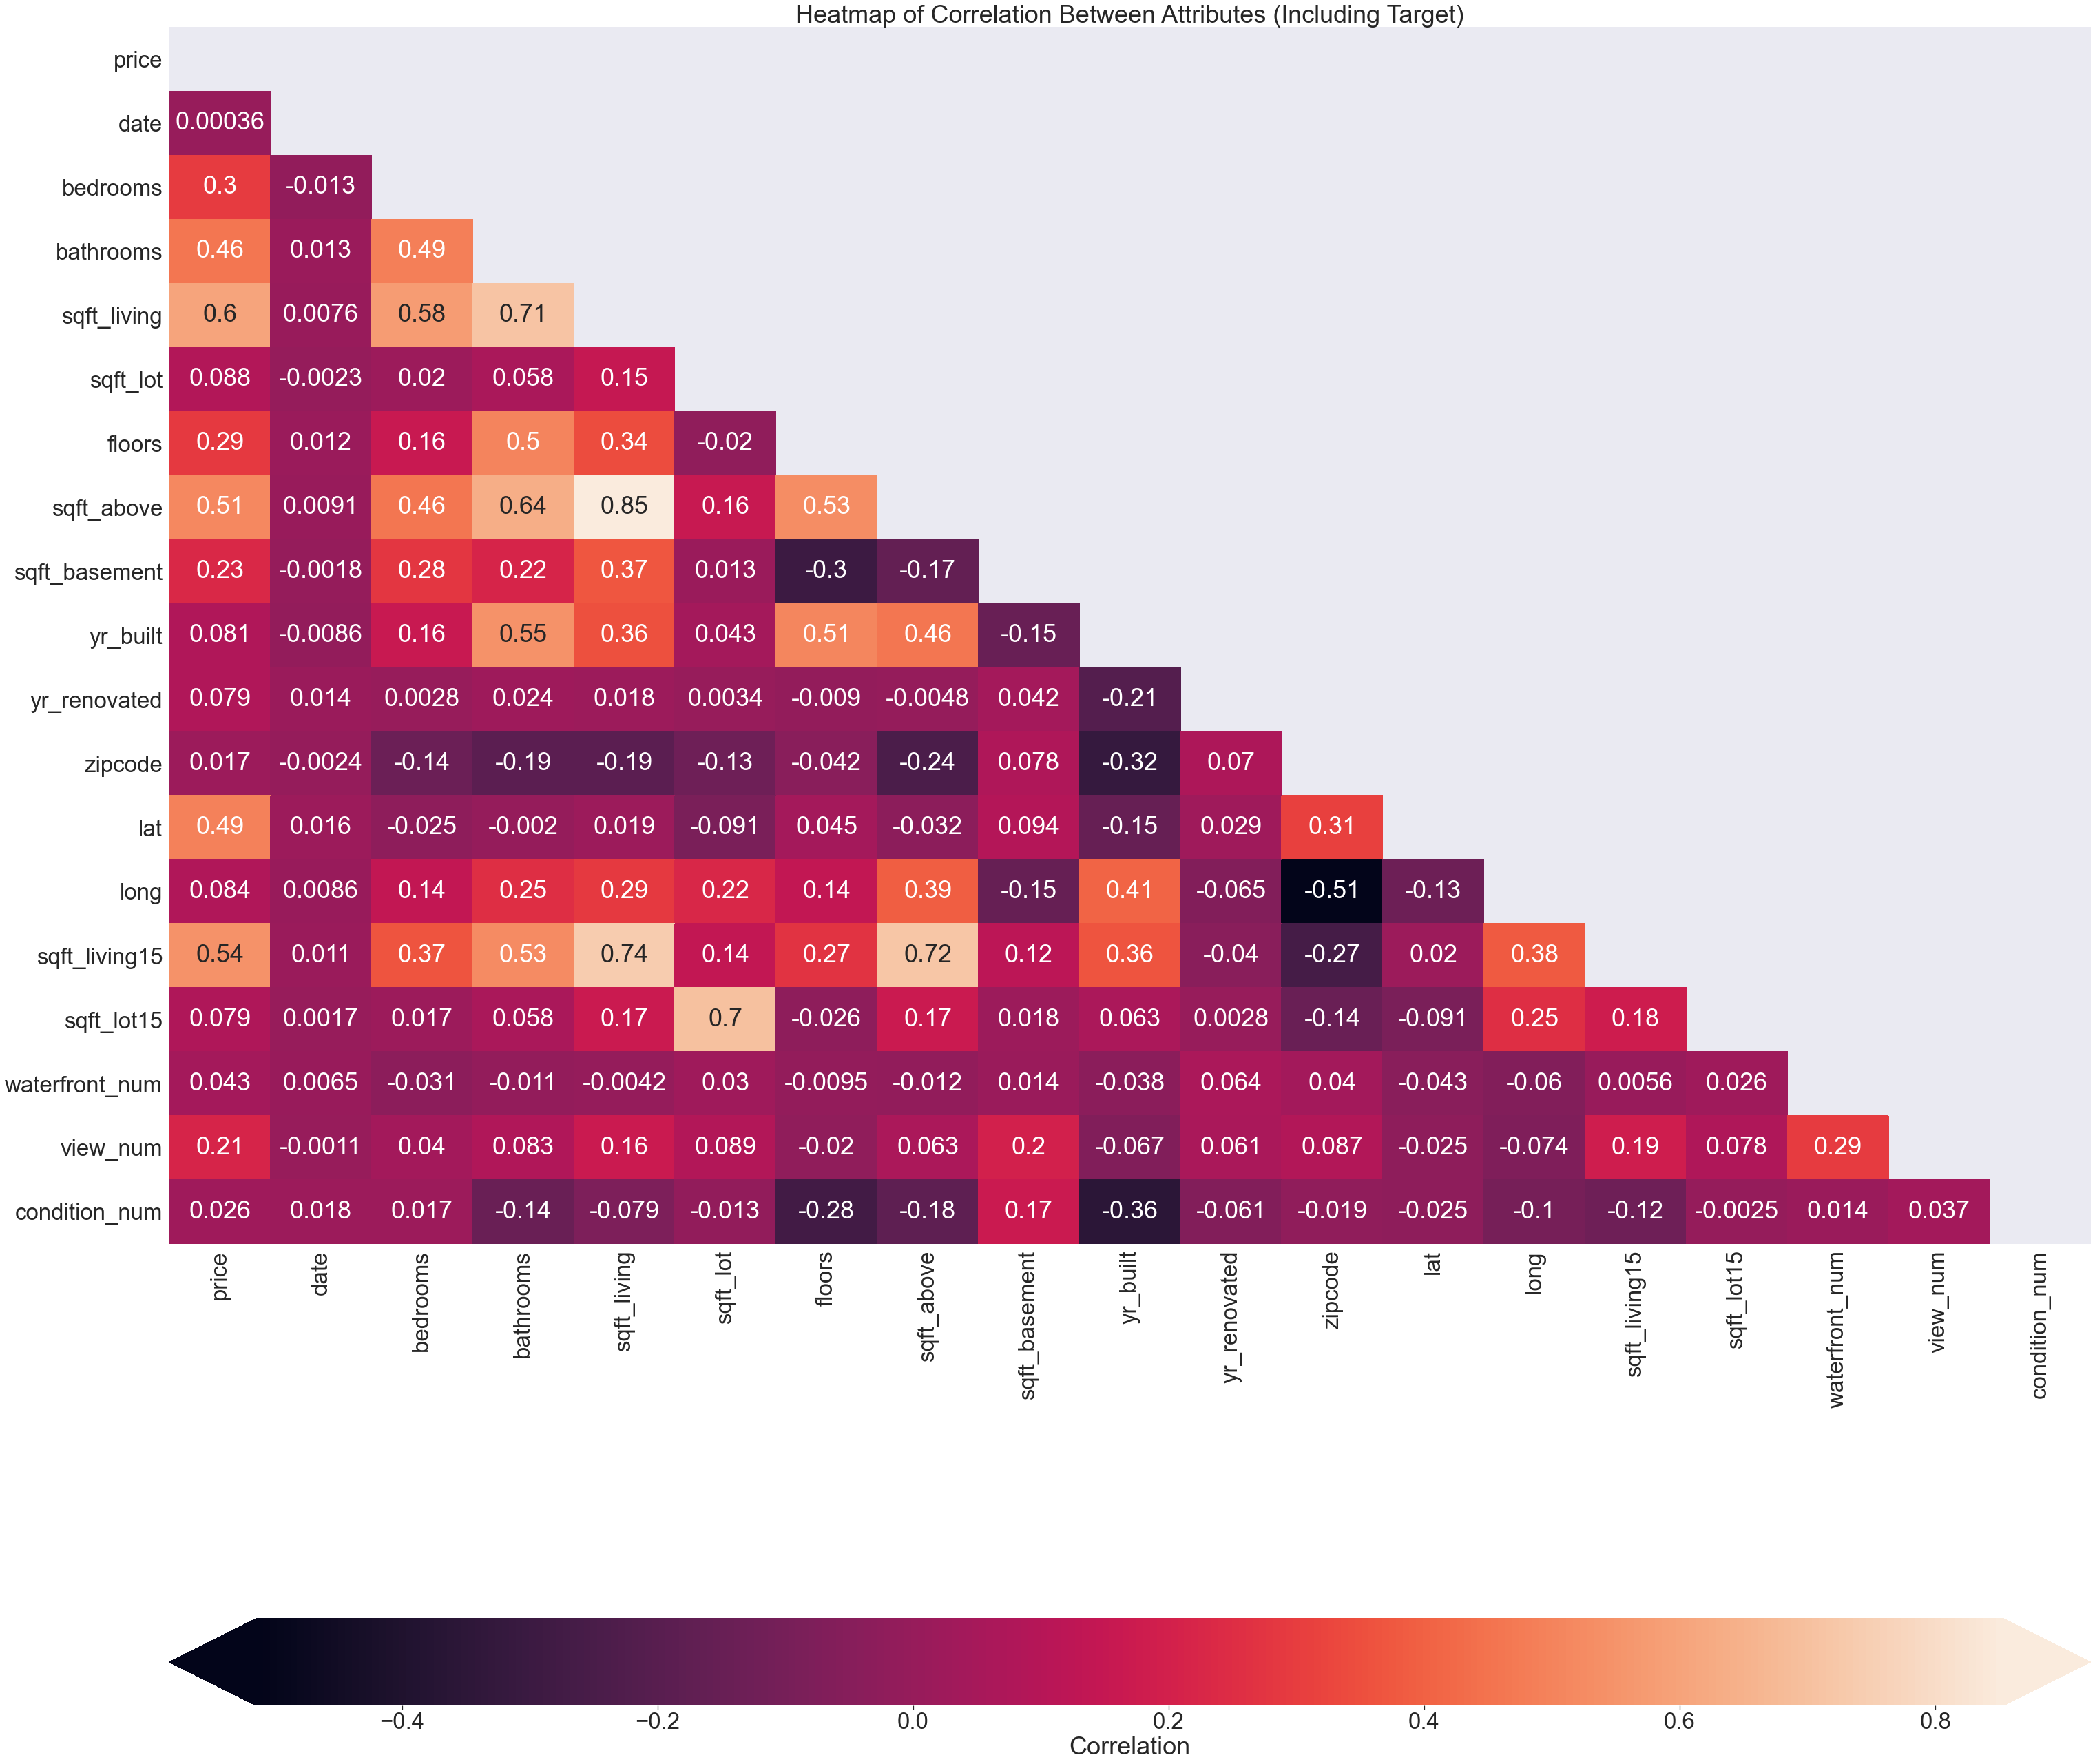

In [69]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(50, 50))

sns.heatmap(
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Nothing correlates well with the target but given the amount of variables that factor into this, that is to be expected. We know that we can get decent scores from the models we produced earlier

Now we will want to create a baseline model to compare our results to as we work through this problem. We will use sqft_living to create the baseline model to compare to.

In [70]:
# Import linear regression to use on the model
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [71]:
# Use cross validation to get train and validation scores for the linear regression model for sqft_living category
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.3699415852299109
Validation score: 0.3497086077553364


Well our current baseline model really is not great. The R squared scores are less than desirable at 0.49 for each. Maybe that will change when we run all of the variables together.

In [72]:
# Use cross validation to get train and validation scores for the linear regression model for all features
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6713135397920925
Validation score: 0.6595190784591415

Baseline Model
Train score:      0.3699415852299109
Validation score: 0.3497086077553364


Well now thats an improvement. Lets make a polynomial linear regression model and train and test it to see how it does. We will start at 3 degrees and see how it does

In [73]:
# Create and fit polynomial feature to model to improve performance
poly_3 = PolynomialFeatures(3)
X_poly3 = poly_3.fit_transform(X_train)

In [74]:
# Run model
model_poly3 = LinearRegression()
scores_complex3 = cross_validate(
                        model_poly3, X_poly3, y_train, cv=5, 
                        return_train_score=True
)
scores_complex3

{'fit_time': array([1.05301428, 1.04242992, 1.11390424, 1.09867215, 0.99802446]),
 'score_time': array([0.00698256, 0.00019407, 0.        , 0.        , 0.01562333]),
 'test_score': array([-101.02354035,    0.41091469,    0.64301108,   -0.75707401,
           0.47454757]),
 'train_score': array([0.61475761, 0.79322683, 0.78794739, 0.7860606 , 0.78824953])}

In [75]:
# Mean train r_2
np.mean(scores_complex3['train_score']), np.std(scores_complex3['train_score'])

(0.7540483934445947, 0.06968574141963906)

In [76]:
# Mean test r_2
np.mean(scores_complex3['test_score']), np.std(scores_complex3['test_score'])

(-20.050428203315818, 40.48959871336517)

In [77]:
# Fit on all the training data
model_poly3.fit(X_poly3, y_train)
model_poly3.score(X_poly3, y_train)

0.7792685998964433

The train score was great at .779 but the test score was terrible at -20. We definitely overfit the data for this. We will tone the model down to 2 degrees and see what we get there.

In [78]:
# Test out our polynomial model
poly_2 = PolynomialFeatures(2)
X_poly2 = poly_2.fit_transform(X_train)

In [79]:
# Run model
model_poly2 = LinearRegression()
scores_complex2 = cross_validate(
                        model_poly2, X_poly2, y_train, cv=5, 
                        return_train_score=True
)
scores_complex2

{'fit_time': array([0.06283116, 0.04987788, 0.06249166, 0.06684208, 0.0625205 ]),
 'score_time': array([0.00199533, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.7531038 , 0.7351755 , 0.73512295, 0.70936485, 0.73771547]),
 'train_score': array([0.75449345, 0.75903367, 0.73639243, 0.72889616, 0.7581204 ])}

In [80]:
# Mean train r_2
np.mean(scores_complex2['train_score']), np.std(scores_complex2['train_score']) 

(0.7473872236111708, 0.0123623953044815)

In [81]:
# Mean test r_2
np.mean(scores_complex2['test_score']), np.std(scores_complex2['test_score'])

(0.7340965121458238, 0.014058780749626666)

In [82]:
# Fit on all the training data
model_poly2.fit(X_poly2, y_train)
model_poly2.score(X_poly2, y_train)

0.7553555393312056

A 75% score is pretty good considering the complexity of this data. Lets figure out what the mean absolute error could be from this model to relay this to the client.

In [205]:
# Back transform log
y_testbt = 10**y_test
y_testbt

0        0.239940
1        0.313198
2        0.212156
4        0.033740
5        0.074113
           ...   
15424    0.180119
15425    0.095137
15426    0.121258
15427    0.122729
15428    0.075174
Name: price, Length: 14598, dtype: float64

In [206]:
# fit model to back transformed data
model_poly2.fit(X_test, y_testbt)

LinearRegression()

In [212]:
# predictions
y_hat_test = model_poly2.predict(X_test)
y_hat_test

array([ 0.48427192,  0.18841655,  0.14540642, ...,  0.19941579,
       -0.02493901, -0.02712097])

In [213]:
# mean squared error
mean_squared_error(y_testbt, y_hat_test)

0.024347543916165348

In [214]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_testbt, y_hat_test)

0.1096379577603346

We definitely scored well on this one. And the scores between the test and train models are pretty consistent with one another. 

This final model should account for 75.5% of the variance in the dataset we currently have and on test sets it should account for 73.4% of the variance in general. The mean absolute error seems to be within $109,000.

In all home prices do fluctuate considering the buyer and seller, as well as other variables that are not included in this dataset. So to account for about three quarters of the variance seems like it would be a great model to submit to the client. The error seems like a lot though so we should do some further digging to get that number reigned in to be closer to something like 20 or 30 thousand. Also, the client doesnt intend to utilize the model as a means to deliver a price in appraising, only as a tool to guide current appaisers in the process. So this model would fit their use.